In [4]:
# adjusting Jupyter Notebook style
from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { width: 80% !important; }</style>"))

## Import modules

In [291]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# fundamentals

from importlib import reload

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# global settings - global_settings.py

if 'global_settings' in dir():
    del global_settings

from global_settings import *
import global_settings
global_settings = reload(global_settings)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# custom functions collection - functions.py

if 'functions' in dir():
    del functions

from functions import *
import functions
functions = reload(functions)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# local variables

debug_mode = False

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Modelling-related Modules
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectPercentile

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Evaluation, optimization, metrics

from sklearn.metrics import recall_score, precision_score, precision_recall_curve, f1_score,\
roc_auc_score, classification_report, confusion_matrix, fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.inspection import permutation_importance

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# model

from sklearn.linear_model import LogisticRegression

In [292]:
functions??

Type:        module
String form: <module 'functions' from '/Users/rafalfedro/Workbench/courses and tests/stackFuel/Portfolio/Portfolinoes/Notebooks/functions.py'>
File:        ~/Workbench/courses and tests/stackFuel/Portfolio/Portfolinoes/Notebooks/functions.py
Source:     
'''Project's custom functions:
    - plot_roc (draws ROC curve)
    - f_divline (draws the divider line in the cell's output)
'''



# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# horizontal divider line

def f_divline(pad_before=True, pad_after=True):
    '''Draws (prints) a simple horizontal line
    Args.:
        pad_before (bool): add pading before the line
        pad_after (bool): add padding after the line
    '''
    line = str('- '*40)
    if pad_before:
        line = '\n'+line
    if pad_after:
        line = line+'\n'
    
    return p

In [7]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# suppress warnings

from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## Prepare F2 metric
**F2** is a variant of harmonic mean between recall and precision, with a stronger weight on the **recall**

Using such a metric for measuring our model's performance is beneficial, since:
- we want to classify correctly as many observations close to leaving (approaching the threshold of target class 1)(optimize FN -> recall)
- at the same time we want to optimize resources used to keep the people falsely predicted as leaving (FP - False Positive -> precision), precision plays a factor, but it's less important than recall

**F0.5** - f-beta with beta=0.5 (more weight on **precision**, less weight on **recall**)\
**F1** - f-beta with beta=1\
**F2** - f-beta with beta=2 (more weight on **recall**, less on **precision**)

In [8]:
from sklearn.metrics import make_scorer,fbeta_score

def f2_score(y_true, y_pred):
    score = fbeta_score(y_true, y_pred, beta=2)
    return score

def f2():
    return make_scorer(f2_score)

## Load, clean and resample the data

In [9]:
raw_data = pd.read_csv('../Data/HR_Analytics.csv')

In [10]:
def sampling_data(DF):
    '''Only to be performed on the train-sets. Handles the outliers, encodes target vector and removes duplicates.
    '''
    DF.drop_duplicates(inplace=True)
    # not sure if it's a good practice to do it on the test set, maybe after split?
    # if happens after the split - requires reindexing of the target vector
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Attrition label encoding
    DF.loc[:,('Attrition')].replace({'Yes': 1, 'No': 0}, inplace=True)
    
    return DF

data = sampling_data(raw_data)

In [11]:
print('Duplicated observations: {}'.format(data.duplicated().sum()))

Duplicated observations: 0


In [12]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# train-test split

Xtrain, Xtest, ytrain, ytest = train_test_split(data.drop('Attrition', axis=1), 
                                                data['Attrition'], 
                                                test_size=0.2, 
                                                shuffle=True,
                                                stratify=data['Attrition'], 
                                                random_state=random_seed_split)
                                                # is stratify practically like undersampling or keeps the original proportion?

In [13]:
# Assign columns to column groups
catcols = ['AgeGroup', 'SalarySlab', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
numcols = ['Education', 'EnvironmentSatisfaction', 'BusinessTravel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
           'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'OverTime', 'Gender', 'Age', 'DailyRate', 'DistanceFromHome', 
           'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
           'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
delcols = ['EmpID', 'EmployeeNumber']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# clean data

def clean_data(DF, delcols=delcols):
    # df = DF.drop_duplicates()  
    df = DF.copy()
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # drop columns with 1 unique value (std=0)
    # practically: 'EmployeeCount', 'StandardHours', 'Over18'
    
    mask_single_value = list(df.nunique().index.values[df.nunique() == 1])
    df = df.loc[:, ~df.columns.isin(mask_single_value)]
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # drop prediction-useless columns
    
    for column in delcols:
        if column in df.columns.values:
            df = df.drop(column, axis=1)
        
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # categ. - label encoding
    
    # df['AgeGroup'].replace({'18-25': 0,
    #                         '26-35': 1,
    #                         '36-45': 2,
    #                         '46-55': 3,
    #                         '55+': 4
    #                        }, inplace=True)
    # df['BusinessTravel'].replace({'Non-Travel': 0,
    #                                'Travel_Rarely': 1,
    #                                'TravelRarely': 1,
    #                                'Travel_Frequently': 2
    #                               }, inplace=True)
    # df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)   # potentially better to one-hot encode
    # df['MaritalStatus'].replace({'Single': 0,
    #                              'Divorced': 1,
    #                              'Married': 2
    #                             }, inplace=True)
    # df['SalarySlab'].replace({'Upto 5k': 0,
    #                           '5k-10k': 1,
    #                           '10k-15k': 2,
    #                           '15k+': 3}, inplace=True)
    # df['OverTime'].replace({'Yes': 1, 'No': 0}, inplace=True)
    # df['PerformanceRating'].replace({3: 0, 4: 1}, inplace=True)
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Encoding as in SVC
    
    df = df.replace({"Yes": 1,
                     "No": 0,
                     "Non-Travel": 0,
                     "TravelRarely": 1,
                     "Travel_Rarely": 1,
                     "Travel_Frequently": 2})
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # NaN handling: fillna with median (temp)
        
    #df = df.dropna(axis=0)
    df = df.fillna(value={'YearsWithCurrManager': df.loc[:,'YearsWithCurrManager'].median()})
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Data Types Conversion
    
    col_dtypes = {'YearsWithCurrManager': 'int8',
                  # 'Department': 'category',
                  # 'EducationField': 'category',
                  # 'JobRole': 'category'
                 }

    for key in col_dtypes:
        df[key] = df[key].astype(col_dtypes[key])
    
    return df

In [14]:
Xtrain = clean_data(Xtrain)
Xtest = clean_data(Xtest)

In [15]:
# Undersampling - reducing the number of Attrition = 0 / No

from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=random_seed)

X_under, y_under = undersampler.fit_resample(Xtrain, ytrain)

# class distribution
pd.crosstab(y_under, columns='count')

col_0,count
Attrition,
0,190
1,190


In [16]:
# Oversampling - increasing the minority class

from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

X_over, y_over = oversampler.fit_resample(Xtrain, ytrain)

# class distribution
pd.crosstab(y_over, columns='count')

col_0,count
Attrition,
0,988
1,988


In [17]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 1278 to 640
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1178 non-null   int64 
 1   AgeGroup                  1178 non-null   object
 2   BusinessTravel            1178 non-null   int64 
 3   DailyRate                 1178 non-null   int64 
 4   Department                1178 non-null   object
 5   DistanceFromHome          1178 non-null   int64 
 6   Education                 1178 non-null   int64 
 7   EducationField            1178 non-null   object
 8   EnvironmentSatisfaction   1178 non-null   int64 
 9   Gender                    1178 non-null   object
 10  HourlyRate                1178 non-null   int64 
 11  JobInvolvement            1178 non-null   int64 
 12  JobLevel                  1178 non-null   int64 
 13  JobRole                   1178 non-null   object
 14  JobSatisfaction       

### Prepare preprocessing

In [18]:
# define num_cols and cat_cols

num_cols = list(Xtrain.select_dtypes(include='number').columns.values)
# cat_cols = list(Xtrain.select_dtypes(include='category').columns.values)
cat_cols = list(Xtrain.select_dtypes(include='object').columns.values)

In [19]:
# main pipeline

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
knnimp = KNNImputer(add_indicator=True)
simpimp = SimpleImputer(strategy='median')
std = StandardScaler()

imputer = simpimp

catpipe = make_pipeline(encoder)
numpipe = Pipeline([('imputer', simpimp),
                    ('scaler', std)])

coltrans = ColumnTransformer(transformers=[('encoder', encoder, cat_cols),
                                           ('numpipe', numpipe, num_cols)], remainder='drop')
selection = SelectPercentile(percentile=90) # percentile=10

### Instantiate classifier

In [20]:
model_name = 'Logistic Regression'
log = LogisticRegression(solver='saga',  
                         class_weight='balanced',
                         max_iter=int(1e4),
                         random_state=random_seed)

# check:
# solver='liblinear'

### Set search space

In [21]:
# np.set_printoptions(suppress=True) # to avoid scientific notation
# temp_C = np.linspace(start=0.01, stop=1, num=10, dtype='float')
# with logistic reg. you want to try the reg. values with increasing steps, not jump straight from the 
# little regul. to a lot

temp_C = np.geomspace(start=0.001, stop=1000, num=14, dtype='float')
print(temp_C)

[1.00000000e-03 2.89426612e-03 8.37677640e-03 2.42446202e-02
 7.01703829e-02 2.03091762e-01 5.87801607e-01 1.70125428e+00
 4.92388263e+00 1.42510267e+01 4.12462638e+01 1.19377664e+02
 3.45510729e+02 1.00000000e+03]


In [22]:
search_space = {'estimator__C': np.geomspace(start=0.136, stop=0.138, num=20, dtype='float'),
                'estimator__penalty': ['l1', 'l2']  # l1 - lasso; l2 - ridge
                
                #'estimator__solver': ['saga', 'liblinear']
                #'selector__percentile': [90]
                #'prepper__numpipe__imputer__strategy': ['mean', 'median']
               }
# start=0.08, stop=0.085  | 0.001 1000
# np.geomspace(start=0.0041, stop=0.00416, num=20, dtype='float')  # best for 'saga'
# np.geomspace(start=0.21, stop=0.3, num=20, dtype='float')  # beginning of tunning of 'liblinear' 0.001 1000

## Pipeline finalization and grid search

In [23]:
pipe_log = Pipeline([('preproc', coltrans),
                     ('selector', selection),
                     ('estimator', log)])

pipe_log = GridSearchCV(estimator=pipe_log,
                        param_grid=search_space,
                        scoring=f2(),
                        cv=6,
                        verbose=3,
                        n_jobs=-1)
pipe_log.fit(Xtrain, ytrain)
#model_svc = pipe_svc.best_estimator_
#print(grid_svc.best_estimator_)

print(pipe_log.best_params_)
print(f'Best F2 score: {pipe_log.best_score_.mean():.2%}')
f_divline()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# prediction on the test set

ypred = pipe_log.best_estimator_.predict(Xtest)

print(f'F2 score on test set:\t{f2_score(ytest, ypred):.2%}')
print(f'Recall on test set:\t{recall_score(ytest, ypred):.2%}')
print(f'Precision on test set:\t{precision_score(ytest, ypred):.2%}')

Fitting 6 folds for each of 40 candidates, totalling 240 fits
{'estimator__C': 0.13662842747580378, 'estimator__penalty': 'l2'}
Best F2 score: 64.04%

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

F2 score on test set:	70.67%
Recall on test set:	85.11%
Precision on test set:	42.11%


LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42,
                   solver='saga')

Best parameters:

{'estimator__C': 0.13662842747580378, 'estimator__penalty': 'l2'}

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

              precision    recall  f1-score   support

  Stayed (0)     0.9650    0.7782    0.8616       248
    Left (1)     0.4211    0.8511    0.5634        47

    accuracy                         0.7898       295
   macro avg     0.6930    0.8146    0.7125       295
weighted avg     0.8783    0.7898    0.8141       295


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 



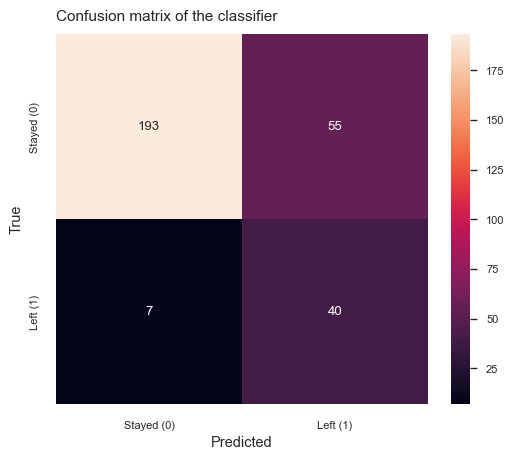

In [24]:
labels = ['Stayed (0)', 'Left (1)']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# classification report

display(log)
print('Best parameters:\n\n{}'.format(pipe_log.best_params_))
f_divline()
print(classification_report(ytest, ypred, target_names=labels, digits=4))
f_divline()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# confusion matrix

plt.subplots(figsize=(6,4.8))

confusion_matrix_base = confusion_matrix(ytest, ypred)
conf_plot = sns.heatmap(confusion_matrix_base, annot=True, fmt='d')

plt.title('Confusion matrix of the classifier')
conf_plot.set_xticklabels(labels)
conf_plot.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True');

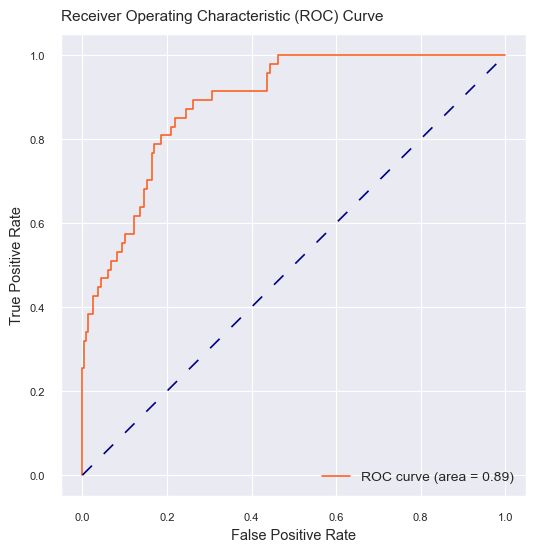

In [25]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# ROC plot

graph_roc = plot_roc(pipe_log, Xtest, ytest)

In [26]:
# increase the precision of result's display
pd.options.display.float_format = '{:.5f}'.format

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Best results of Cross Validation on GridSearch

results = pd.DataFrame(pipe_log.cv_results_).sort_values(by='mean_test_score', ascending=False).head(8).T
results

,39,27,21,17,23,15,25,13
mean_fit_time,0.02926,0.03178,0.03146,0.03081,0.03108,0.03012,0.03374,0.02982
std_fit_time,0.00376,0.00524,0.00339,0.00132,0.00374,0.00351,0.00828,0.00167
mean_score_time,0.00229,0.00231,0.00230,0.00253,0.00226,0.00226,0.00265,0.00229
std_score_time,0.00012,0.00010,0.00010,0.00059,0.00008,0.00006,0.00094,0.00015
param_estimator__C,0.13800,0.13737,0.13705,0.13684,0.13715,0.13673,0.13726,0.13663
param_estimator__penalty,l2,l2,l2,l2,l2,l2,l2,l2
params,"{'estimator__C': 0.138, 'estimator__penalty': ...","{'estimator__C': 0.13736526392594048, 'estimat...","{'estimator__C': 0.1370489915390976, 'estimato...","{'estimator__C': 0.13683854793562977, 'estimat...","{'estimator__C': 0.1371543346749679, 'estimato...","{'estimator__C': 0.13673344734379184, 'estimat...","{'estimator__C': 0.13725975878316898, 'estimat...","{'estimator__C': 0.13662842747580378, 'estimat..."
split0_test_score,0.62827,0.62827,0.62827,0.62827,0.62827,0.62827,0.62827,0.62827
split1_test_score,0.61856,0.61856,0.61856,0.61856,0.61856,0.61856,0.61856,0.61856
split2_test_score,0.72581,0.72581,0.72581,0.72581,0.72581,0.72581,0.72581,0.72581


## Feature importance

In [27]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Estimate feature importance through permutation importance

result = permutation_importance(pipe_log, Xtrain, ytrain, n_repeats=50, random_state=random_seed)
importance_scores = result.importances_mean # abs

original_columns = Xtrain.columns
feature_importance_list = list(zip(original_columns, importance_scores))
sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=False)
orig_sorted_features, orig_sorted_importance = zip(*sorted_feature_importance)

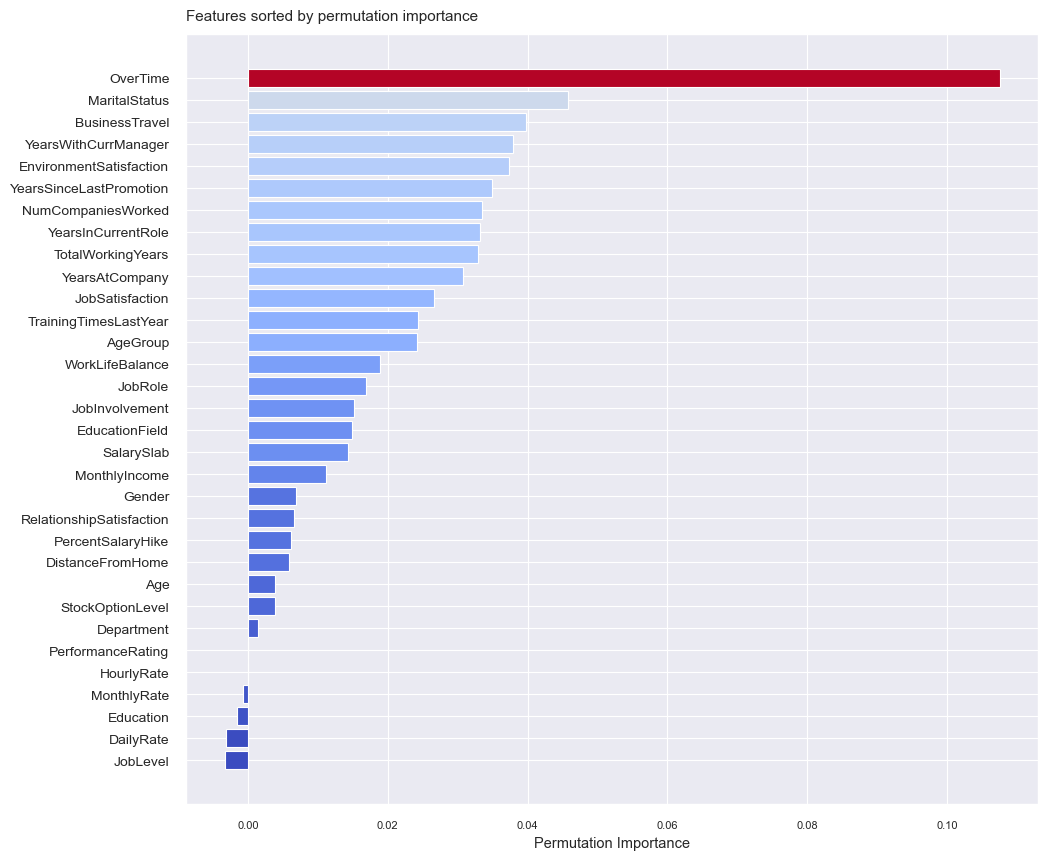

In [28]:
plt.rc('ytick', labelsize=10)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Visualization

import matplotlib as mpl
from matplotlib.cm import get_cmap

colors = []
cmap = mpl.colormaps['coolwarm']

# scale data
data = orig_sorted_importance
denominator = max(data) - min(data) # max(data) - min(data)
scaled_data = [(datum - min(data)) / denominator for datum in data]

for decimal in scaled_data:
    colors.append(cmap(decimal))


fig_feature_importance, ax = plt.subplots(figsize=(11,10))

ax.barh(orig_sorted_features, orig_sorted_importance, color=colors)
ax.set(title='Features sorted by permutation importance',
      xlabel='Permutation Importance');

#ax.set_xticklabels({:.2%})

# Feature Selection

## Importance threshold

In [29]:
importance_threshold = 0.002
selected_features = []

for feature in feature_importance_list:
    if feature[1] > importance_threshold:
        selected_features.append(feature[0])

print('Num of features selected: {} out of {}'.format(len(selected_features), len(feature_importance_list)))
f_divline(False, False)
print(selected_features)

Num of features selected: 25 out of 32
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['Age', 'AgeGroup', 'BusinessTravel', 'DistanceFromHome', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [30]:
# additional features to be excluded
exclude_features = ['YearsSinceLastPromotion']

for feature in exclude_features:
    if feature in selected_features:
        selected_features.remove(feature)
        
print(len(selected_features))

24


### Preprocessing

In [31]:
Xtrain_feat_sel = Xtrain.copy()
Xtest_feat_sel = Xtest.copy()

Xtrain_feat_sel = Xtrain_feat_sel.loc[:, selected_features]
Xtest_feat_sel = Xtest_feat_sel.loc[:, selected_features]

print('Num of features in Xtrain:\t{}'.format(Xtrain_feat_sel.shape[1]))
print('Num of features in Xtest:\t{}'.format(Xtest_feat_sel.shape[1]))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Define num_cols and cat_cols

num_cols = list(Xtrain_feat_sel.select_dtypes(include='number').columns.values)
# cat_cols = list(Xtrain_feat_sel.select_dtypes(include='category').columns.values)
cat_cols = list(Xtrain_feat_sel.select_dtypes(include='object').columns.values)

Num of features in Xtrain:	24
Num of features in Xtest:	24


In [32]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# main pipeline

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
knnimp = KNNImputer(add_indicator=True)
simpimp = SimpleImputer(strategy='median')
std = StandardScaler()

imputer = simpimp

catpipe = make_pipeline(encoder)
numpipe = Pipeline([('imputer', simpimp),
                    ('scaler', std)])

coltrans = ColumnTransformer(transformers=[('encoder', encoder, cat_cols),
                                           ('numpipe', numpipe, num_cols)], remainder='drop')
selection = SelectPercentile(percentile=90) # percentile=10

### Instantiate classifier

In [33]:
model_name = 'Logistic Regression'
log = LogisticRegression(solver='saga',  
                         class_weight='balanced',
                         max_iter=int(1e4),
                         random_state=random_seed)

# check:
# solver='liblinear'

### Set search space

In [34]:
# np.set_printoptions(suppress=True) # to avoid scientific notation
# temp_C = np.linspace(start=0.01, stop=1, num=10, dtype='float')
# with logistic reg. you want to try the reg. values with increasing steps, not jump straight from the 
# little regul. to a lot

temp_C = np.geomspace(start=0.001, stop=1000, num=14, dtype='float')
print(temp_C)

[1.00000000e-03 2.89426612e-03 8.37677640e-03 2.42446202e-02
 7.01703829e-02 2.03091762e-01 5.87801607e-01 1.70125428e+00
 4.92388263e+00 1.42510267e+01 4.12462638e+01 1.19377664e+02
 3.45510729e+02 1.00000000e+03]


In [36]:
search_space = {'estimator__C': np.geomspace(start=0.0185, stop=0.0189, num=20, dtype='float'),
                'estimator__penalty': ['l1', 'l2'],  # l1 - lasso; l2 - ridge
                'estimator__solver': ['saga', 'liblinear'] # ‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’
                #'selector__percentile': [90]
                #'prepper__numpipe__imputer__strategy': ['mean', 'median']
               }
# start=0.0723, stop=0.0725
# start=0.08, stop=0.085
# np.geomspace(start=0.0041, stop=0.00416, num=20, dtype='float')  # best for 'saga'
# np.geomspace(start=0.21, stop=0.3, num=20, dtype='float')  # beginning of tunning of 'liblinear' 0.001 1000

## Pipeline finalization and grid search

In [37]:
pipe_log = Pipeline([('preproc', coltrans),
                     ('selector', selection),
                     ('estimator', log)])

pipe_log = GridSearchCV(estimator=pipe_log,
                        param_grid=search_space,
                        scoring=f2(),
                        cv=6,
                        verbose=3,
                        n_jobs=-1)
pipe_log.fit(Xtrain_feat_sel, ytrain)
#model_svc = pipe_svc.best_estimator_
#print(grid_svc.best_estimator_)

print(pipe_log.best_params_)
print(f'Best F2 score: {pipe_log.best_score_.mean():.2%}')
f_divline()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# prediction on the test set

ypred = pipe_log.best_estimator_.predict(Xtest_feat_sel)

print(f'F2 score on test set:\t{f2_score(ytest, ypred):.2%}')
print(f'Recall on test set:\t{recall_score(ytest, ypred):.2%}')
print(f'Precision on test set:\t{precision_score(ytest, ypred):.2%}')

Fitting 6 folds for each of 80 candidates, totalling 480 fits
{'estimator__C': 0.018541703462168678, 'estimator__penalty': 'l2', 'estimator__solver': 'saga'}
Best F2 score: 63.09%

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

F2 score on test set:	72.44%
Recall on test set:	87.23%
Precision on test set:	43.16%


In [563]:
# custom colormap

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

# colormap definition
colors = ['red', 'darkred', '#ecede6', 'darkgreen', 'yellowgreen']
nodes = [0, 0.25, 0.5, 0.75, 1]
cf_cmap = LinearSegmentedColormap.from_list('RBlG', list(zip(nodes, colors)))

# reversed version
cf_cmap_r = cf_cmap.reversed()

# registering a colormap
mpl.colormaps.unregister('RBlG')
mpl.colormaps.unregister('RBlG_r')
mpl.colormaps.register(cmap=cf_cmap)
mpl.colormaps.register(cmap=cf_cmap_r)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42,
                   solver='saga')

Best parameters:

{'estimator__C': 0.018541703462168678, 'estimator__penalty': 'l2', 'estimator__solver': 'saga'}

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

              precision    recall  f1-score   support

  Stayed (0)     0.9700    0.7823    0.8661       248
    Left (1)     0.4316    0.8723    0.5775        47

    accuracy                         0.7966       295
   macro avg     0.7008    0.8273    0.7218       295
weighted avg     0.8842    0.7966    0.8201       295


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 



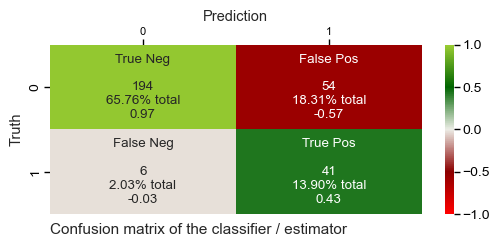

In [564]:
from sklearn.metrics import ConfusionMatrixDisplay

labels = ['Stayed (0)', 'Left (1)']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# classification report

display(log)
print('Best parameters:\n\n{}'.format(pipe_log.best_params_))
f_divline()
print(classification_report(ytest, ypred, target_names=labels, digits=4))
f_divline()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# confusion matrix

cf_matrix = confusion_matrix(ytest, ypred)
cf_matrix_norm = cf_matrix / np.sum(cf_matrix, axis=0)
cf_matrix_norm[0][1] = -cf_matrix_norm[0][1]
cf_matrix_norm[1][0] = -cf_matrix_norm[1][0]

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%} total'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
group_norm_pred = ['{0:.2f}'.format(value) for value in cf_matrix_norm.flatten()]

cm_labels = [f'{v1}\n\n{v2}\n{v3}\n{v4}' for v1, v2, v3, v4 in zip(group_names, group_counts, group_percentages, group_norm_pred)]
cm_labels = np.asarray(cm_labels).reshape(2,2)

plt.subplots(figsize=(6,2.2))
conf_plot = sns.heatmap(cf_matrix_norm, annot=cm_labels, fmt='', cmap='RBlG', vmin=-1, vmax=1)
conf_plot.xaxis.set_label_position('top')
conf_plot.xaxis.tick_top()

plt.title('Confusion matrix of the classifier / estimator', y=-0.2)
# conf_plot.set_xticklabels(labels)
# conf_plot.set_yticklabels(labels)
plt.xlabel('Prediction')
plt.ylabel('Truth');
plt.grid(alpha=0)

[[194  54]
 [  6  41]]
False positive rate:	 0.21774193548387097
Recall:			 0.8723404255319149



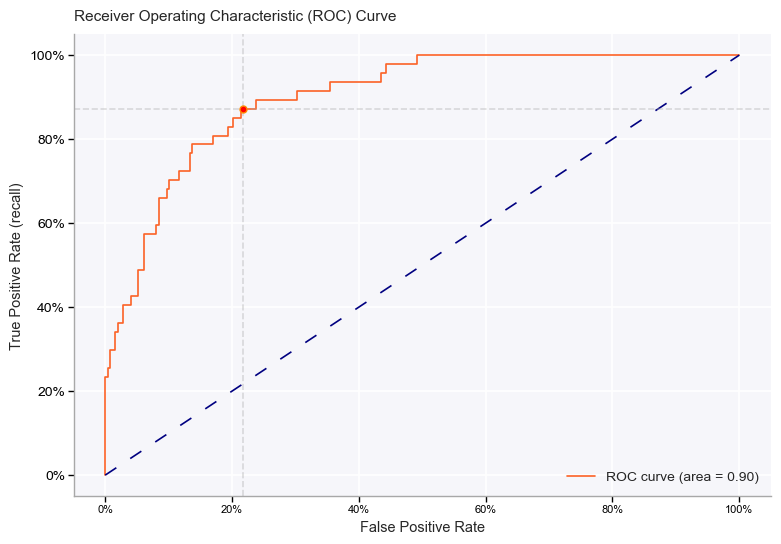

In [497]:
# axes, colors
plt.rc('axes', edgecolor='#a8a8a8', facecolor='#f6f6fa', axisbelow=True, grid=True)
plt.rc('axes.spines', top=False, right=False)

# ticks
plt.rc('xtick', direction='out', color='black', labelcolor='#000000', bottom=True)
plt.rc('ytick', direction='out', color='black', labelcolor='#000000', left=True)
plt.rc('xtick.major', pad=2, width=1, size=4)
plt.rc('ytick.major', pad=2, width=1, size=4)

# grid
plt.rc('grid', color='w', linestyle='solid', linewidth=1.2, alpha=1)

plt.rc('lines', linewidth=1.2, color='darkgrey')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# ROC plot

plot_roc(pipe_log, Xtest_feat_sel, ytest)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# calculating threshold (0.5) location on the ROC curve

cm = confusion_matrix_base.copy()
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]
print(cm)

cm_fpr = fp / (fp + tn)
cm_recall = tp / (fn + tp)
print('False positive rate:\t {}'.format(cm_fpr))
print('Recall:\t\t\t {}\n'.format(cm_recall))

# yscores = pipe_log.predict_proba(Xtest)[:,1]
# fpr, recall, _ = roc_curve(ytest, yscores, drop_intermediate=False)

# adding a marker for current threshold
plt.axvline(cm_fpr, ls='--', alpha=0.4)
plt.axhline(cm_recall, ls='--', alpha=0.4)
plt.plot(cm_fpr, cm_recall, 'o', ms=5, mec='darkorange', mfc='red',mew=1); #mec='orange', mfc='orange', 
# graph_roc.plot(cm_fpr, cm_recall, 'o', ms=60, mec='red', mfc='none', mew=1, alpha=0.4); #mec='orange', mfc='orange', 

In [55]:
# predicted threshold - another way of controlling recall vs precision

df_pred = pd.DataFrame({'predicted class': ypred, 'predicted proba (class: 1)': pipe_log.best_estimator_.predict_proba(Xtest_feat_sel)[:,1]})
df_pred

,predicted class,predicted proba (class: 1)
0,0,0.49266
1,1,0.73377
2,1,0.76272
3,1,0.57199
4,1,0.63163
...,...,...
290,1,0.95346
291,1,0.59612
292,0,0.05577
293,0,0.07849


In [44]:
# increase the precision of result's display
pd.options.display.float_format = '{:.5f}'.format

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Best results of Cross Validation on GridSearch

results = pd.DataFrame(pipe_log.cv_results_).sort_values(by='mean_test_score', ascending=False).head(8)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__penalty,param_estimator__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
50,0.01081,0.00262,0.00212,0.00012,0.01875,l2,saga,"{'estimator__C': 0.018751635163531444, 'estima...",0.63830,0.60606,0.66667,0.64433,0.52764,0.70270,0.63095,0.05470,1
54,0.01163,0.00308,0.00224,0.00021,0.01877,l2,saga,"{'estimator__C': 0.0187727586201518, 'estimato...",0.63830,0.60606,0.66667,0.64433,0.52764,0.70270,0.63095,0.05470,1
34,0.01062,0.00247,0.00208,0.00005,0.01867,l2,saga,"{'estimator__C': 0.018667378754809467, 'estima...",0.63830,0.60606,0.66667,0.64433,0.52764,0.70270,0.63095,0.05470,1
26,0.01032,0.00150,0.00218,0.00015,0.01863,l2,saga,"{'estimator__C': 0.018625392627414104, 'estima...",0.63830,0.60606,0.66667,0.64433,0.52764,0.70270,0.63095,0.05470,1
38,0.01081,0.00184,0.00268,0.00123,0.01869,l2,saga,"{'estimator__C': 0.018688407297755408, 'estima...",0.63830,0.60606,0.66667,0.64433,0.52764,0.70270,0.63095,0.05470,1
74,0.01101,0.00214,0.00287,0.00179,0.01888,l2,saga,"{'estimator__C': 0.01887873336901609, 'estimat...",0.63830,0.60606,0.66667,0.64433,0.52764,0.70270,0.63095,0.05470,1
22,0.01100,0.00226,0.00266,0.00068,0.01860,l2,saga,"{'estimator__C': 0.01860443498974545, 'estimat...",0.63830,0.60606,0.66667,0.64433,0.52764,0.70270,0.63095,0.05470,1
42,0.00955,0.00033,0.00211,0.00009,0.01871,l2,saga,"{'estimator__C': 0.01870945952906297, 'estimat...",0.63830,0.60606,0.66667,0.64433,0.52764,0.70270,0.63095,0.05470,1


## Feature importance

In [45]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Estimate feature importance through permutation importance

result = permutation_importance(pipe_log, Xtrain_feat_sel, ytrain, n_repeats=50, random_state=random_seed)
importance_scores = result.importances_mean # abs

original_columns = Xtrain_feat_sel.columns
feature_importance_list = list(zip(original_columns, importance_scores))
sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=False)
orig_sorted_features, orig_sorted_importance = zip(*sorted_feature_importance)

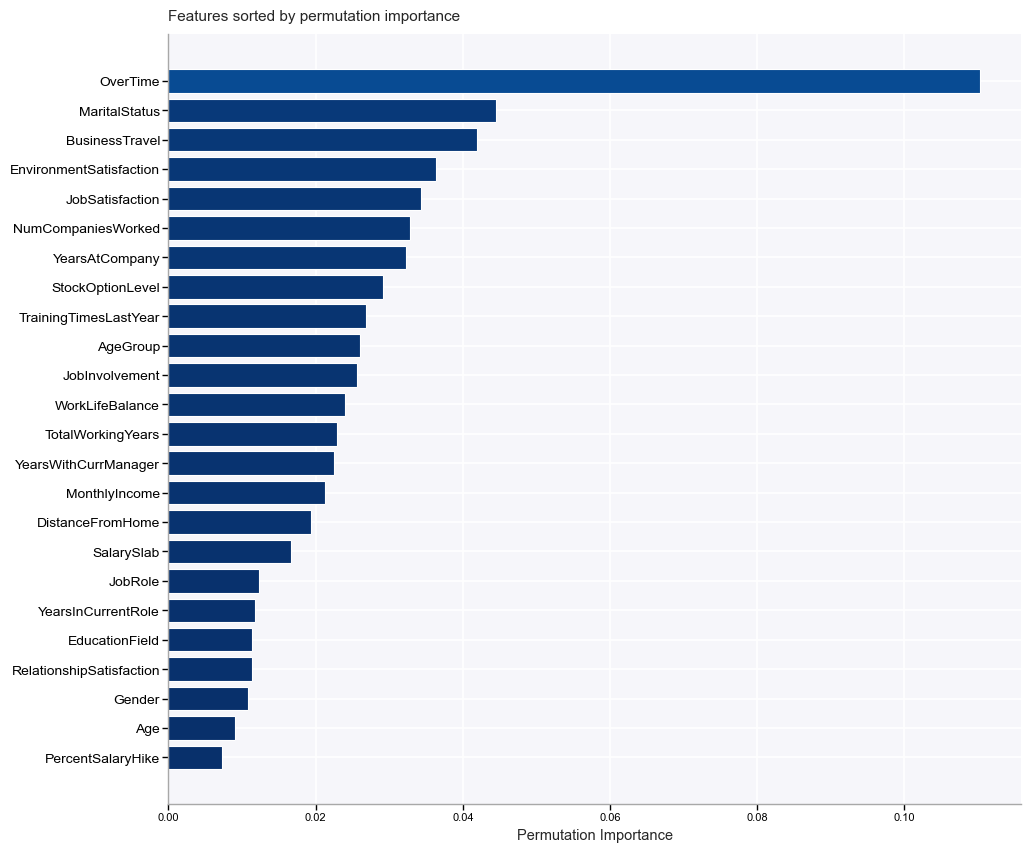

In [585]:
plt.rc('ytick', labelsize=10)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Visualization

import matplotlib as mpl
from matplotlib.cm import get_cmap

colors = []
cmap = mpl.colormaps['Blues_r']

# scale data
data = orig_sorted_importance
denominator = max(data) - min(data) # max(data) - min(data)
scaled_data = [((datum - min(data)) / 1) for datum in data]

for decimal in scaled_data:
    colors.append(cmap(decimal))


fig_feature_importance, ax = plt.subplots(figsize=(11,10))

ax.barh(orig_sorted_features, orig_sorted_importance, color=colors)
ax.set(title='Features sorted by permutation importance',
      xlabel='Permutation Importance');

#ax.set_xticklabels({:.2%})

# Feature Engineering
### Few initial ideas
- `'PercentSalaryHike'` ~ `'YearsSinceLastPromotion'`\
Lack of salary increase / promotions can impact the decission of an employee looking for a new employer

- `'YearsAtCompany'` ~ `'YearsInCurrentRole'` or `'YearsSinceLastPromotion'`\
Not being promoted for a longer periods of time can have influence on employee's decision about leaving

- `'MaritalStatus'` ~ `'Overtime'` and `'BusinesTravel'` or `'WorkLifeBalance'`\
All the factors which may have influence over the fact that an employee is married

- `'YearsAtCompany'` ~ `'YearsWithCurrManager'`\
Changes in the management might impact person's decision about leaving

- `'Age'` ~ `'YearsAtCompany'`\
Rather unlikely that older people are changing the job, while the young ones - do

- `'Age'` ~ `'NumCompaniesWorked'`\
How often an employee changes the job (are they a "dinosaurs" or a "jumpers")

### Mid-step clustering
- as per `'MonthlyIncome'` (pairplot: `'Age'`, `'TotalWorkingYears'`, `'HourlyRate'`, etc.): observations are strongly clustered, possibly due to the positions at the company (managerial / reg. employees)
- we could cluster them in the initial step of the pipeline and use different classification strategies per each cluster (KMeans?)
- practically: have a new feature (column) with the cluster id, i.e. 1 for managers, 0 for regular employees
- in layman terms: potentially the regular employee has different reasons for leaving the company than a veteran manager